In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
colors = 10*["g", "r", "c", "b","k"]

In [4]:
def get_counts(anything):
    counts = {}
    for a in anything:
        if a in counts:
            counts[a] = counts[a] + 1
        else:
            counts[a] = 1
    return counts


In [5]:
def get_bar_dic(data,n,data_mean):
    bar_dic = {}
    for i in range(n):
        bar_dic[data_mean.index[i]] = ((data[i] - data_mean[i])/data_mean[i])*100
    return bar_dic

In [6]:
def get_best_k(data,max_k):
    max_value = 0
    final_k = 2
    for k in range(2,max_k+1):
        temp = KMeans(n_clusters=k).fit_predict(data)
        value = metrics.calinski_harabaz_score(data, temp)
        if value > max_value:
            max_value = value
            final_k = k
    return final_k

In [7]:
test = pd.read_csv('E:/Study/data/final_data_1.csv')
test_1 = pd.read_csv('E:/Study/data/final_data_2.csv')
test_2 = pd.read_csv('E:/Study/data/final_data_3.csv')
test_3 = pd.read_csv('E:/Study/data/final_data_4.csv')
test_4 = pd.read_csv('E:/Study/data/final_data_5.csv')

In [8]:
data = pd.concat([test,test_1, test_2, test_3, test_4], ignore_index=True)

In [9]:
data.describe()

,n_transfer,start_time,bus,subway,rer,tramway,t_trip,t_sep,day_start,day_end
count,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000,131996.000000
mean,1.313320,36134.890360,0.380193,0.626958,0.265213,0.040956,1695.590253,25026.832806,32666.612655,66312.764652
std,0.635091,12404.276959,0.590506,0.539928,0.471617,0.210821,1949.229267,11928.843466,9546.888534,10687.249383
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-85488.000000,3600.000000,0.000000,0.000000
25%,1.000000,28440.000000,0.000000,0.000000,0.000000,0.000000,691.000000,13560.000000,27904.000000,62233.000000
50%,1.000000,31662.000000,0.000000,1.000000,0.000000,0.000000,1216.000000,28815.000000,30780.000000,67075.000000
75%,1.000000,41786.000000,1.000000,1.000000,1.000000,0.000000,2152.000000,33897.000000,34556.250000,72044.000000
max,6.000000,85886.000000,6.000000,6.000000,4.000000,5.000000,40933.000000,86300.000000,83156.000000,86398.000000


In [10]:
drop_result = data.drop(data.columns[[0,2,3,4,5,8,9]], axis=1)

In [12]:
drop_result

,start_time,t_trip,t_sep
0,31080,2845,27935
1,27188,788,31234
2,597,1446,53341
3,33647,393,14728
4,24196,4156,29122
5,27924,1589,32499
6,32222,2370,34310
7,26032,1517,35975
8,27496,2175,33938
9,31828,1364,34310


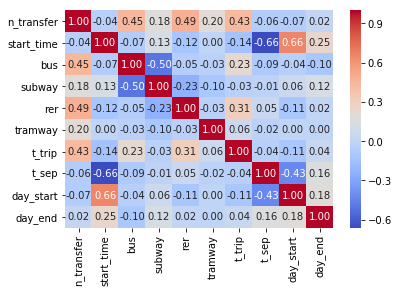

In [13]:
g = sns.heatmap(data[["n_transfer","start_time","bus","subway",
                      "rer","tramway","t_trip","t_sep","day_start","day_end"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.figure(figsize=(15,5))
plt.show()

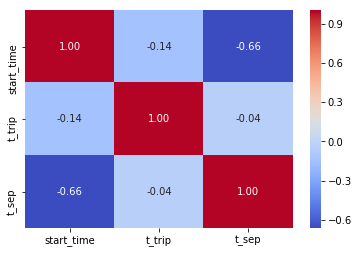

In [14]:
g = sns.heatmap(drop_result[["start_time","t_trip","t_sep"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.figure(figsize=(15,5))
plt.show()

In [15]:
x = np.array(data).astype(float)

In [16]:
x_2 =  np.array(drop_result).astype(float)

In [17]:
x = preprocessing.scale(x) 

In [18]:
x_2 = preprocessing.scale(x_2)

In [14]:
pca = PCA(n_components=2)
newdata = pca.fit_transform(data)

In [15]:
newdata[0]

array([ 6013.30746806,  1108.57526287])

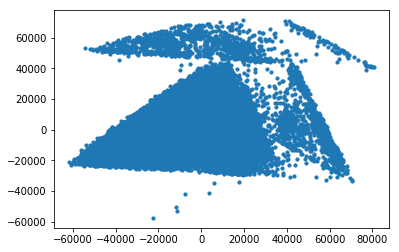

In [16]:
plt.scatter(newdata[:,0], newdata[:,1], s=10)
plt.show()

In [19]:
get_best_k(x_2, 9)

2

In [20]:
y_pre = KMeans(n_clusters=6).fit_predict(x)

In [24]:
y_2_pre = KMeans(n_clusters=2).fit_predict(x_2)

In [21]:
get_counts(y_pre)


{0: 8757, 1: 46168, 2: 24572, 3: 5065, 4: 22122, 5: 25312}

In [22]:
data['type'] = y_pre

In [25]:
drop_result['type'] = y_2_pre

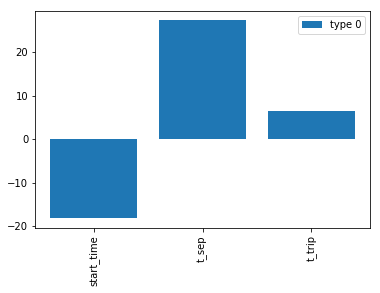

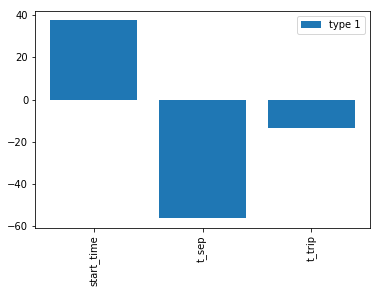

In [26]:
drop_0 = drop_result[drop_result['type'] == 0]
drop_1 = drop_result[drop_result['type'] == 1]
drop_mean = drop_result.mean()
drop_0_mean = drop_0.mean()
drop_1_mean = drop_1.mean()
plt.bar(get_bar_dic(drop_0_mean,3, drop_mean).keys(),get_bar_dic(drop_0_mean,3,drop_mean).values(), label='type 0')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(drop_1_mean,3, drop_mean).keys(),get_bar_dic(drop_1_mean,3,drop_mean).values(), label='type 1')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()

In [27]:
drop_0_mean

start_time    29580.996817
t_trip         1806.253889
t_sep         31842.496755
type              0.000000
dtype: float64

In [16]:
data_type_0 = data[data['type'] == 0]

In [17]:
data_type_1 = data[data['type'] == 1]

In [18]:
data_type_2 = data[data['type'] == 2]

In [19]:
data_type_3 = data[data['type'] == 3]

In [20]:
data_type_4 = data[data['type'] == 4]

In [21]:
data_type_5 = data[data['type'] == 5]

In [22]:
data_mean = data.mean()

In [23]:
data_0_mean = data_type_0.mean()
data_1_mean = data_type_1.mean()
data_2_mean = data_type_2.mean()
data_3_mean = data_type_3.mean()
data_4_mean = data_type_4.mean()
data_5_mean = data_type_5.mean()

In [26]:
data_0_mean

n_transfer        1.393243
start_time    30522.626812
bus               0.124260
subway            0.248295
rer               1.020687
tramway           0.000000
t_trip         2235.606306
t_sep         28593.058946
day_start     29168.625593
day_end       65875.757893
type              0.000000
dtype: float64

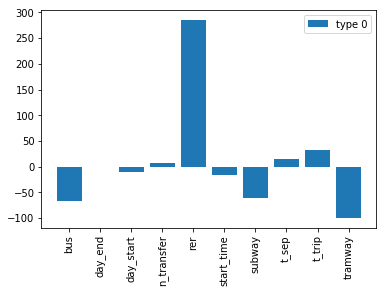

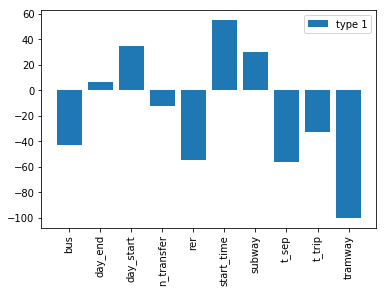

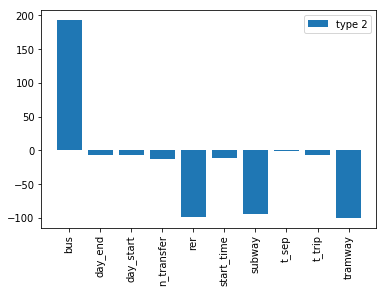

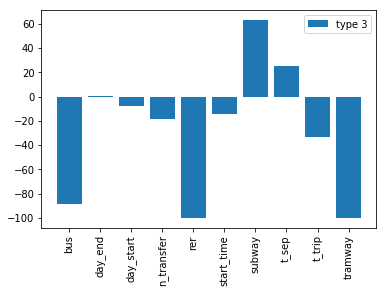

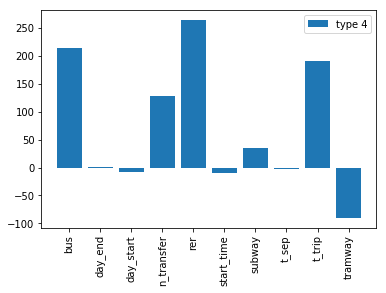

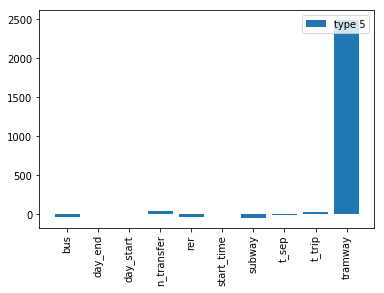

In [27]:
plt.bar(get_bar_dic(data_0_mean).keys(),get_bar_dic(data_0_mean).values(), label='type 0')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(data_1_mean).keys(),get_bar_dic(data_1_mean).values(), label='type 1')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(data_2_mean).keys(),get_bar_dic(data_2_mean).values(), label='type 2')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(data_3_mean).keys(),get_bar_dic(data_3_mean).values(), label='type 3')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(data_4_mean).keys(),get_bar_dic(data_4_mean).values(), label='type 4')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()
plt.bar(get_bar_dic(data_5_mean).keys(),get_bar_dic(data_5_mean).values(), label='type 5')
plt.xticks(rotation = 90)
plt.legend(loc="upper right")
plt.show()